<a href="https://colab.research.google.com/github/logansmith9454/cse450/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV



campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [2]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
feature_dict = {'age': (0.6, 0.04),
                'pdays': (0.594, 0.29),

                }

In [59]:
# features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
# features = ['contact', 'month', 'day_of_week']
# features = ['campaign', 'pdays', 'previous', 'poutcome']
# features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# all_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.dropna()

campaign['y'] = campaign['y'].map({'no': 0, 'yes': 1})
campaign['job_cat'] = campaign['job'].astype('category')
campaign['mar_cat'] = campaign['marital'].astype('category')
campaign['edu_cat'] = campaign['education'].astype('category')
campaign['def_cat'] = campaign['default'].astype('category')
campaign['hous_cat'] = campaign['housing'].astype('category')
campaign['loan_cat'] = campaign['loan'].astype('category')
campaign['con_cat'] = campaign['contact'].astype('category')
campaign['mon_cat'] = campaign['month'].astype('category')
campaign['dow_cat'] = campaign['day_of_week'].astype('category')
campaign['pout_cat'] = campaign['poutcome'].astype('category')
campaign['not_contacted'] = (campaign['pdays'] == 999).astype(int)
median_pdays = campaign[campaign['pdays'] != 999]['pdays'].median()
campaign['pdays'] = campaign['pdays'].replace(999, median_pdays)
features = ['age', 'job_cat', 'mar_cat', 'edu_cat', 'def_cat', 'hous_cat', 'loan_cat', 'con_cat', 'mon_cat', 'dow_cat', 'campaign', 'previous', 'pout_cat', 'not_contacted', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# features = ['euribor3m', 'cons.conf.idx', 'nr.employed', 'not_contacted']
X = pd.get_dummies(campaign[features], drop_first=True)
y = campaign['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# # Predict
# y_pred = clf.predict(X_test)
# y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probs for AUC

# # Metrics (focus on F1/ROC-AUC for imbalance)
# print(classification_report(y_test, y_pred))
# print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}')  # Aim for >0.8

# fig, ax = plt.subplots(figsize=(20, 20))
# tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
# plt.show()

0.8356262925995863

In [60]:
# Baseline accuracy
baseline = accuracy_score(y_test, clf.predict(X_test))
print(f"Baseline Accuracy: {baseline:.3f}")

# Permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importances = result.importances_mean

# Sort individual features
sorted_idx = importances.argsort()[::-1]
print("\nIndividual Feature Importances (Drop in Accuracy):")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.3f} (drop from {baseline:.3f})")

Baseline Accuracy: 0.836

Individual Feature Importances (Drop in Accuracy):
euribor3m: 0.058 (drop from 0.836)
nr.employed: 0.039 (drop from 0.836)
con_cat_telephone: 0.035 (drop from 0.836)
cons.conf.idx: 0.017 (drop from 0.836)
mon_cat_nov: 0.017 (drop from 0.836)
pout_cat_success: 0.012 (drop from 0.836)
mon_cat_aug: 0.007 (drop from 0.836)
age: 0.007 (drop from 0.836)
cons.price.idx: 0.007 (drop from 0.836)
mon_cat_oct: 0.006 (drop from 0.836)
mar_cat_single: 0.004 (drop from 0.836)
not_contacted: 0.004 (drop from 0.836)
job_cat_technician: 0.004 (drop from 0.836)
dow_cat_wed: 0.003 (drop from 0.836)
edu_cat_university.degree: 0.002 (drop from 0.836)
previous: 0.002 (drop from 0.836)
mar_cat_married: 0.002 (drop from 0.836)
def_cat_unknown: 0.002 (drop from 0.836)
mon_cat_may: 0.001 (drop from 0.836)
hous_cat_yes: 0.001 (drop from 0.836)
job_cat_services: 0.001 (drop from 0.836)
edu_cat_basic.9y: 0.001 (drop from 0.836)
campaign: 0.001 (drop from 0.836)
job_cat_unemployed: 0.001 (

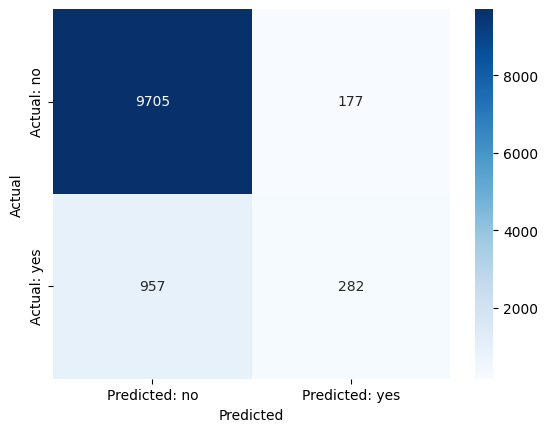

In [39]:
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: no', 'Predicted: yes'], yticklabels=['Actual: no', 'Actual: yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
df['pdays'] = (df['pdays'] == 999).astype(int)
df['contact'] = (df['pdays'] == 'telephone').astype(int)
df['poutcome'] = (df['poutcome'] == 'success').astype(int)

ro = RandomOverSampler()

df = df.dropna(subset=['euribor3m', 'cons.conf.idx', 'nr.employed', 'pdays', 'contact', 'poutcome'])
features = ['euribor3m', 'cons.conf.idx', 'nr.employed', 'pdays', 'contact']
X = df[features]
y = df['y']

X_new, y_new = ro.fit_resample(X, y)

new_df = pd.DataFrame(y_new)
new_df.value_counts()


# Identify categorical columns (excluding 'y')
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Convert target variable 'y' to numerical
y = y.map({'no': 0, 'yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
clf = RandomForestClassifier(class_weight='balanced', n_estimators=125)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8330186134340437
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3286
           1       0.35      0.57      0.44       421

    accuracy                           0.83      3707
   macro avg       0.65      0.72      0.67      3707
weighted avg       0.87      0.83      0.85      3707



In [106]:
param_grid = {'n_estimators': [100, 125], 'max_depth': [10, None]}
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

# Predict/eval
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(grid.best_estimator_)

{'max_depth': 10, 'n_estimators': 125}
0.8425457326331353
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3286
           1       0.35      0.63      0.45       421

    accuracy                           0.83      3707
   macro avg       0.65      0.74      0.68      3707
weighted avg       0.88      0.83      0.85      3707

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=125)
